<a href="https://colab.research.google.com/github/MeghaNagarmunoli/Database-Systems-Implementation-5/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


In [18]:

%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

device = 'cuda'

In [19]:

from torchvision import datasets
import torchvision.transforms as transforms
import tensorflow as tf

# for i in range(0, len(x_train_mnist)):
#   plt.imshow(x_train_mnist[i].squeeze(), cmap='gray_r')
#   plt.show()
#   print("Label : ", y_train_mnist[i])learn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# get the training datasets
# train_data = datasets.MNIST(root='data', train=True,
#                                    download=True, transform=transform)

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)

# prepare data loader

# for i in range(0, len(x_train_mnist)):
#   plt.imshow(x_train_mnist[i].squeeze(), cmap='gray_r')
#   plt.show()
#   print("Label : ", y_train_mnist[i])



# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# print(images.shape)
# print(labels.shape)

# counter = {}

# def getMNISTData(numOfImagesofEachLabel = 1000) : 
#     (x_train_mnist, y_train_mnist) = images.numpy(), labels.numpy()
#     x_train_mnist_reduced = []
#     y_train_mnist_reduced = []
#     ''' Only get 1000 images of each label from MNIST Dataset'''

#     for j in range(0, len(y_train_mnist)):
#       if y_train_mnist[j] not in counter:
#         counter[y_train_mnist[j]] = 0

#       if counter[y_train_mnist[j]] < numOfImagesofEachLabel:
#         x_train_mnist_reduced.append(x_train_mnist[j])
#         y_train_mnist_reduced.append(y_train_mnist[j])
#         counter[y_train_mnist[j]] += 1

#         # print("Count :", count, " label : ", i)
#         # break

#     return np.array(x_train_mnist_reduced) , np.array(y_train_mnist_reduced) 
# x_train_mnist, y_train_mnist = getMNISTData(numOfImagesofEachLabel = 2000)


# print(list(y_train_mnist).count(6))



# tensor_x = torch.Tensor(x_train_mnist) # transform to torch tensor
# tensor_y = torch.Tensor(y_train_mnist)

# my_dataset = TensorDataset(tensor_x, tensor_y)
# #my_dataloader = DataLoader(my_dataset)

# train_loader = torch.utils.data.DataLoader(my_dataset, batch_size=batch_size,
#                                            num_workers=num_workers, shuffle=True)

In [20]:

# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')

# def view_samples1(epoch, samples):
#     # samples = samples.to('cpu')
#     fig, axes = plt.subplots(figsize=(5,5), nrows=5, ncols=samples.size()[0]//5, sharey=True, sharex=True)
#     for ax, img in zip(axes.flatten(), samples):
#         img = img.to('cpu').detach()
#         ax.xaxis.set_visible(False)
#         ax.yaxis.set_visible(False)
#         im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
#     plt.savefig('graphs/DCGAN Epoch ' + str(epoch) + '.png')

torch.utils.data.dataloader.DataLoader
<class 'torch.Tensor'>


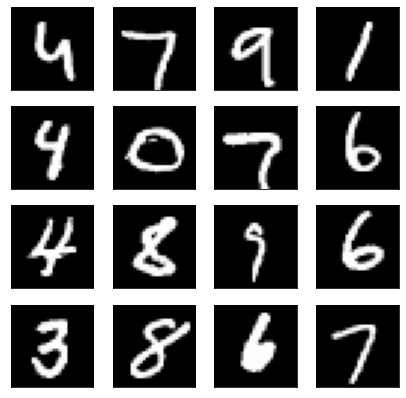

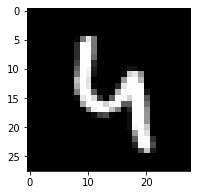

In [21]:
# obtain one batch of training images
print(type(train_loader))
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(images))
view_samples(0, [images])
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (3,3)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')



In [22]:
import torch.nn as nn
import torch.nn.functional as F

# class Discriminator(nn.Module):

#     def __init__(self, input_size, hidden_dim, output_size):
#         super(Discriminator, self).__init__()
        
#         # define hidden linear layers
#         self.fc1 = nn.Linear(input_size, hidden_dim*4)
#         self.fc2 = nn.Linear(hidden_dim*4, hidden_dim*2)
#         self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)

        
#         # final fully-connected layer
#         self.fc4 = nn.Linear(hidden_dim, output_size)
        
#         # dropout layer 
#         self.dropout = nn.Dropout(0.3)
        
        
#     def forward(self, x):
#         # flatten image
#         x = x.view(-1, 28*28)
#         # all hidden layers
#         x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
#         x = self.dropout(x)
#         x = F.leaky_relu(self.fc2(x), 0.2)
#         x = self.dropout(x)
#         x = F.leaky_relu(self.fc3(x), 0.2)
#         x = self.dropout(x)

#         # final layer
#         out = self.fc4(x)

#         return out



class Generator(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(100, 256*7*7)
        self.trans_conv1 = nn.ConvTranspose2d(256, 128, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)

        self.trans_conv2 = nn.ConvTranspose2d(128, 64, kernel_size = 3, stride = 1, padding = 1)

        self.trans_conv3 = nn.ConvTranspose2d(64, 32, kernel_size = 3, stride = 1, padding = 1)

        self.trans_conv4 = nn.ConvTranspose2d(32, 1, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)
    
    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 256, 7, 7)
        x = F.relu(self.trans_conv1(x))
 
        x = F.relu(self.trans_conv2(x))

        x = F.relu(self.trans_conv3(x))

        x = self.trans_conv4(x)
        x = torch.tanh(x)
        
        return x

class Discriminator(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv0 = nn.Conv2d(1, 32, kernel_size = 3, stride = 2, padding = 1)
        self.conv0_drop = nn.Dropout2d(0.25)

        self.conv1 = nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1)
        self.conv1_drop = nn.Dropout2d(0.25)

        self.conv2 = nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1)
        self.conv2_drop = nn.Dropout2d(0.25)

        self.conv3 = nn.Conv2d(128, 256, kernel_size = 3, stride = 2, padding = 1)
        self.conv3_drop = nn.Dropout2d(0.25)

        self.fc = nn.Linear(12544, 1)
    
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = F.leaky_relu(self.conv0(x), 0.2)

        x = self.conv0_drop(x)
        x = F.leaky_relu(self.conv1(x), 0.2)

        x = self.conv1_drop(x)
        x = F.leaky_relu(self.conv2(x), 0.2)

        x = self.conv2_drop(x)
        x = F.leaky_relu(self.conv3(x), 0.2)

        x = self.conv3_drop(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features




In [23]:
# class Generator(nn.Module):

#     def __init__(self, input_size, hidden_dim, output_size):
#         super(Generator, self).__init__()
        
#         # define hidden linear layers
#         self.fc1 = nn.Linear(input_size, hidden_dim)
#         self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
#         self.fc3 = nn.Linear(hidden_dim*2, hidden_dim*4)
        
#         # final fully-connected layer
#         self.fc4 = nn.Linear(hidden_dim*4, output_size)
        
#         # dropout layer 
#         self.dropout = nn.Dropout(0.3)

#     def forward(self, x):
#         # all hidden layers
#         x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
#         x = self.dropout(x)
#         x = F.leaky_relu(self.fc2(x), 0.2)
#         x = self.dropout(x)
#         x = F.leaky_relu(self.fc3(x), 0.2)
#         x = self.dropout(x)
#         # final layer with tanh applied
#         out = F.tanh(self.fc4(x))

#         return out


In [24]:

# Size of input image to discriminator (28*28)
input_size = 784
# Size of discriminator output (real or fake)
d_output_size = 1
# Size of last hidden layer in the discriminator
d_hidden_size = 32

# Generator hyperparams

# Size of latent vector to give to generator
z_size = 100
# Size of discriminator output (generated image)
g_output_size = 784
# Size of first hidden layer in the generator
g_hidden_size = 32

In [25]:

# instantiate discriminator and generator
D = Discriminator()
G = Generator()
D = D.to(device)
G = G.to(device)
# check that they are as you expect
print(D)
print()
print(G)

Discriminator(
  (conv0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv0_drop): Dropout2d(p=0.25, inplace=False)
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_drop): Dropout2d(p=0.25, inplace=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_drop): Dropout2d(p=0.25, inplace=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3_drop): Dropout2d(p=0.25, inplace=False)
  (fc): Linear(in_features=12544, out_features=1, bias=True)
)

Generator(
  (fc): Linear(in_features=100, out_features=12544, bias=True)
  (trans_conv1): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (trans_conv2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (trans_conv3): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (trans_conv4): ConvTranspose2d(32, 1,

In [26]:
# Calculate losses
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = (torch.ones(batch_size)*0.9).to(device)
    else:
        labels = torch.ones(batch_size).to(device) # real labels = 1
        
    # numerically stable loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size).to(device) # fake labels = 0
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [27]:
import torch.optim as optim

# Optimizers
lr = 0.0002

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr)
g_optimizer = optim.Adam(G.parameters(), lr)

In [28]:
import pickle as pkl

# training hyperparams
num_epochs = 10

# keep track of loss and generated, "fake" samples
samples = []
losses = []

print_every = 400

# Get some fixed data for sampling. These are images that are held
# constant throughout training, and allow us to inspect the model's performance

GENERATOR_NUM_FEATURES = 100
# train the network
def sample_input(batch_size=-1):
  if batch_size != -1:
    return torch.normal(mean=torch.zeros((batch_size, GENERATOR_NUM_FEATURES)),
                      std = torch.ones((batch_size, GENERATOR_NUM_FEATURES)))
  else:
    return torch.normal(mean=torch.zeros(GENERATOR_NUM_FEATURES),
                        std = torch.ones(GENERATOR_NUM_FEATURES))
sample_size = 40
fixed_z = sample_input(sample_size).to(device)

print("start D train")
D.train()
print("start G train")
G.train()
for epoch in range(num_epochs):
    
    for batch_i, (real_images, _) in enumerate(train_loader):
                
        batch_size = real_images.size(0)
        
        ## Important rescaling step ## 
        real_images = real_images.to(device)  #*2 - 1  # rescale input images from [0,1) to [-1, 1)
        

        #TRAIN THE DISCRIMINATOR

        
        d_optimizer.zero_grad()
        
        # 1. Train with real images

        # Compute the discriminator losses on real images 
        # smooth the real labels
        # print("calculate real loss")
        D_real = D(real_images)
        d_real_loss = real_loss(D_real, smooth=True)
        
        # 2. Train with fake images
        
        # Generate fake images
        z = sample_input(batch_size).to(device)
        # z = torch.from_numpy(z).float()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images        
        D_fake = D(fake_images)
        d_fake_loss = fake_loss(D_fake)
        
        # add up loss and perform backprop
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()
        

        #TRAIN THE GENERATOR

        g_optimizer.zero_grad()
        
        # 1. Train with fake images and flipped labels
        
        # Generate fake images
        z = sample_input(batch_size).to(device)
        # z = torch.from_numpy(z).float()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images 
        # using flipped labels!
        D_fake = D(fake_images)
        g_loss = real_loss(D_fake) # use real loss to flip labels
        
        # perform backprop
        g_loss.backward()
        g_optimizer.step()

        # Print some loss stats
        if batch_i % print_every == 0:
            # print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                    epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    
    ## AFTER EACH EPOCH##
    # append discriminator loss and generator loss
    losses.append((d_loss.item(), g_loss.item()))
    
    # generate and save sample, fake images
    G.eval() # eval mode for generating samples
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train() # back to train mode


# Save training generator samples
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

start D train
start G train
Epoch [    1/   10] | d_loss: 1.3924 | g_loss: 0.7051
Epoch [    1/   10] | d_loss: 0.8852 | g_loss: 2.1803
Epoch [    1/   10] | d_loss: 0.8510 | g_loss: 2.1452
Epoch [    2/   10] | d_loss: 0.8209 | g_loss: 1.9966
Epoch [    2/   10] | d_loss: 0.7467 | g_loss: 2.3127
Epoch [    2/   10] | d_loss: 0.8649 | g_loss: 1.8232
Epoch [    3/   10] | d_loss: 0.6750 | g_loss: 1.8462
Epoch [    3/   10] | d_loss: 0.7990 | g_loss: 2.2538
Epoch [    3/   10] | d_loss: 0.9033 | g_loss: 2.1197
Epoch [    4/   10] | d_loss: 0.9289 | g_loss: 1.5075
Epoch [    4/   10] | d_loss: 0.8113 | g_loss: 1.5695
Epoch [    4/   10] | d_loss: 1.0073 | g_loss: 1.4909
Epoch [    5/   10] | d_loss: 1.0822 | g_loss: 2.0712
Epoch [    5/   10] | d_loss: 0.9792 | g_loss: 1.4956
Epoch [    5/   10] | d_loss: 0.9916 | g_loss: 1.3013
Epoch [    6/   10] | d_loss: 1.1183 | g_loss: 1.4835
Epoch [    6/   10] | d_loss: 1.0085 | g_loss: 1.7070
Epoch [    6/   10] | d_loss: 0.9888 | g_loss: 1.2572


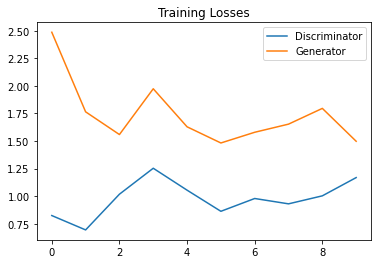

In [29]:

fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()

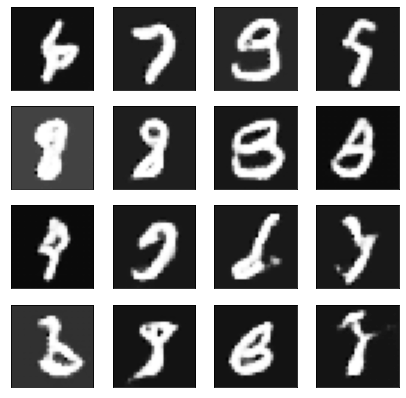

In [30]:
# with open('train_samples.pkl', 'rb') as f:
#     samples = pkl.load(f)
def view_samples1(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.cpu().detach().numpy()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
view_samples1(-1, samples)

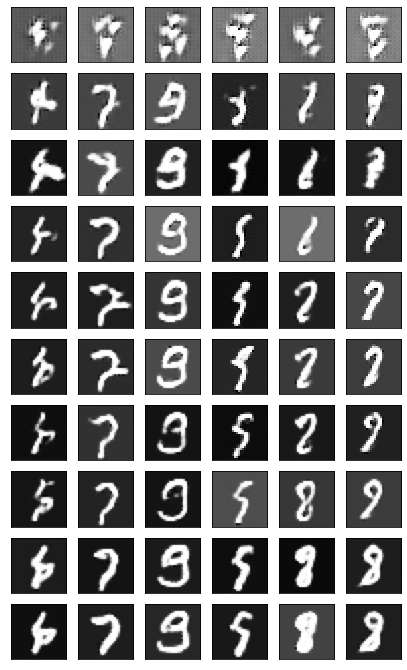

In [31]:
rows = 10 # split epochs into 10, so 100/10 = every 10 epochs
cols = 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples, axes):
    for img, ax in zip(sample[:int(len(sample)/cols)], ax_row):
        img = img.cpu().detach().numpy()
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)


<class 'torch.Tensor'>


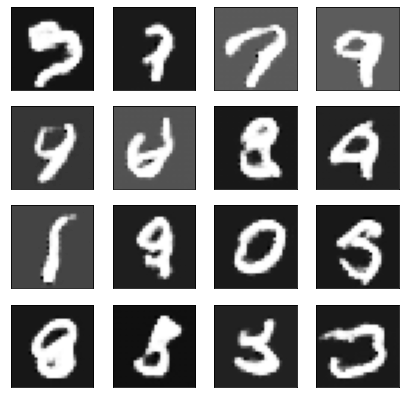

In [32]:
sample_size=16
rand_z = sample_input(batch_size).to(device)
# rand_z = torch.from_numpy(rand_z).float()

G.eval() # eval mode
# generated samples
rand_images = G(rand_z)
print(type(rand_images))
# 0 indicates the first set of samples in the passed in list
# and we only have one batch of samples, here
view_samples1(0, [rand_images])